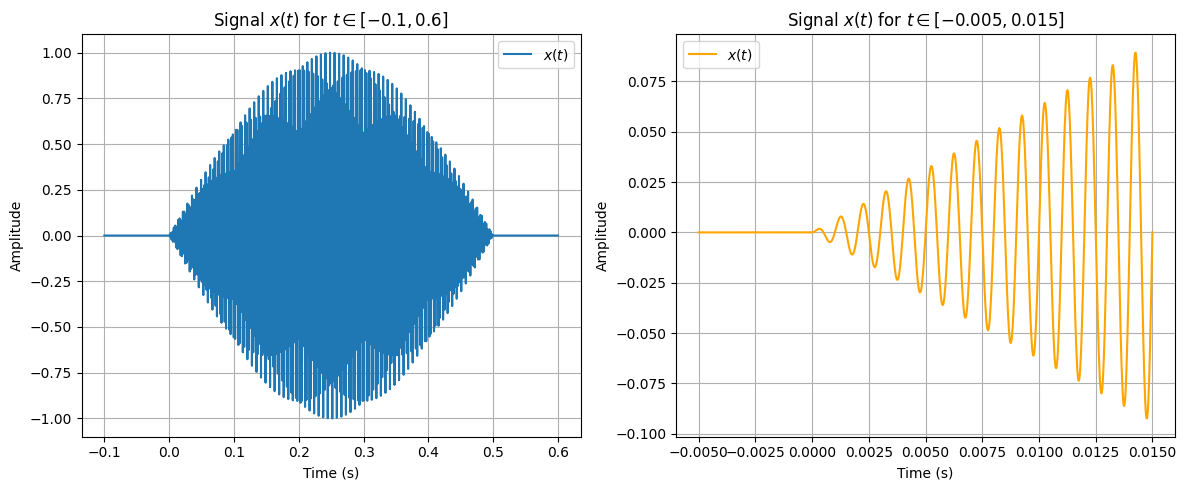

In [45]:
# 2.a)

import numpy as np
import matplotlib.pyplot as plt


# Define the signal x(t)
def x_t(t):
    return np.where((t >= 0) & (t <= 0.5), np.sin(2000 * np.pi * t) * np.sin(2 * np.pi * t), 0)


# Time ranges
t1 = np.linspace(-0.1, 0.6, 1000)  # t ∈ [-0.1, 0.6]
t2 = np.linspace(-0.005, 0.015, 1000)  # t ∈ [-0.005, 0.015]

# Compute x(t) for the two time ranges
x1 = x_t(t1)
x2 = x_t(t2)

# Plot the signal for t ∈ [-0.1, 0.6]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t1, x1, label="$x(t)$")
plt.title("Signal $x(t)$ for $t \\in [-0.1, 0.6]$")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Plot the signal for t ∈ [-0.005, 0.015]
plt.subplot(1, 2, 2)
plt.plot(t2, x2, label="$x(t)$", color="orange")
plt.title("Signal $x(t)$ for $t \\in [-0.005, 0.015]$")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

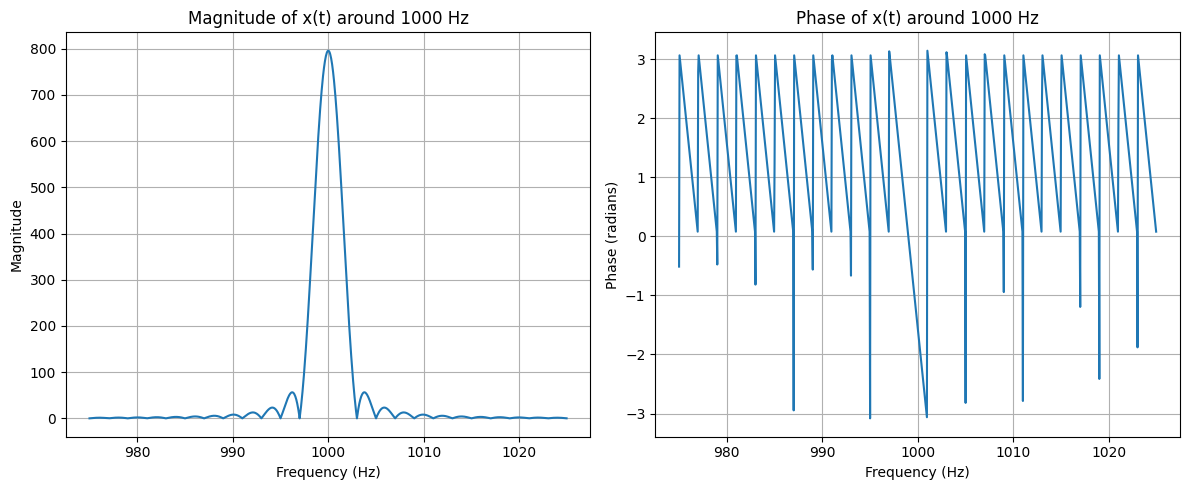

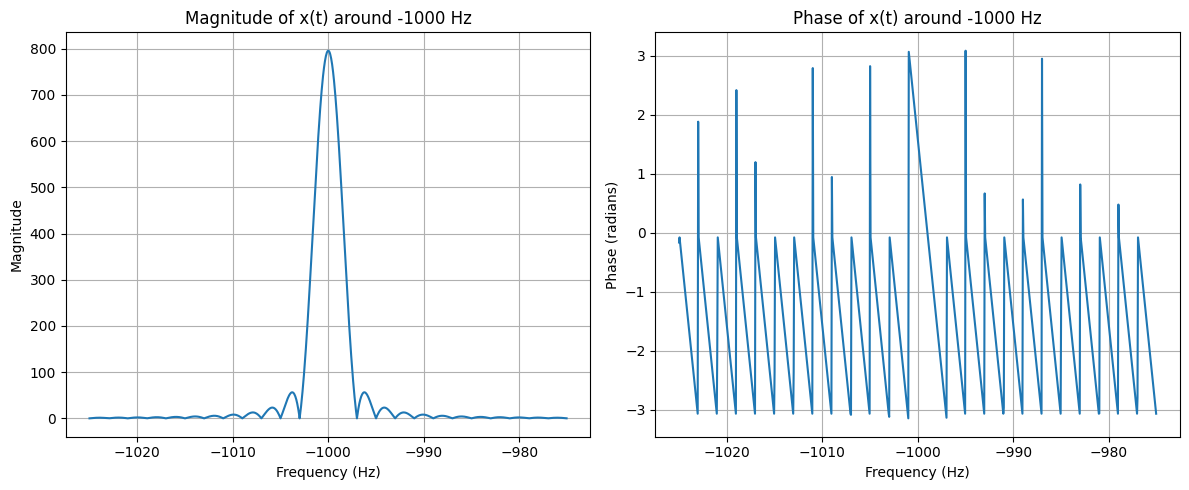

In [ ]:
# 2.c)

from scipy.fftpack import fft, fftfreq

# Sampling parameters
fs = 5000  # Sampling frequency
T = 1 / fs  # Sampling period
t = np.arange(0, 0.5, T)  # Time vector (only the duration where the signal exists)


def x_t(t):
    return np.where((t >= 0) & (t <= 0.5), np.sin(2000 * np.pi * t) * np.sin(2 * np.pi * t), 0)


# Compute the Fourier Transform of the signal
N = len(t)
X_f = fft(x, n=100000)  # Use zero-padding for higher resolution
freqs = fftfreq(len(X_f), T)

# Compute magnitude and phase
magnitude = np.abs(X_f)
phase = np.angle(X_f)
# Identify peaks in magnitude spectrum
from scipy.signal import find_peaks

peaks, _ = find_peaks(magnitude, height=np.max(magnitude) * 0.1)  # Peaks above 10% of max
peak_frequencies = freqs[peaks]

peak_range = 500
for peak in peaks:
    # Plot the magnitude spectrum
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(
        freqs[peak - peak_range : peak + peak_range],
        magnitude[peak - peak_range : peak + peak_range],
    )
    # plt.plot(freqs, magnitude)
    plt.title(f"Magnitude of x(t) around {round(freqs[peak])} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()

    # Plot phase around the peaks
    plt.subplot(1, 2, 2)
    plt.plot(
        freqs[peak - peak_range : peak + peak_range],
        phase[peak - peak_range : peak + peak_range],
    )
    # plt.scatter(peak_frequencies, phase[peaks], color='red', label='Phase at Peaks')
    plt.title(f"Phase of x(t) around {round(freqs[peak])} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (radians)")
    plt.grid()

    plt.tight_layout()
    plt.show()

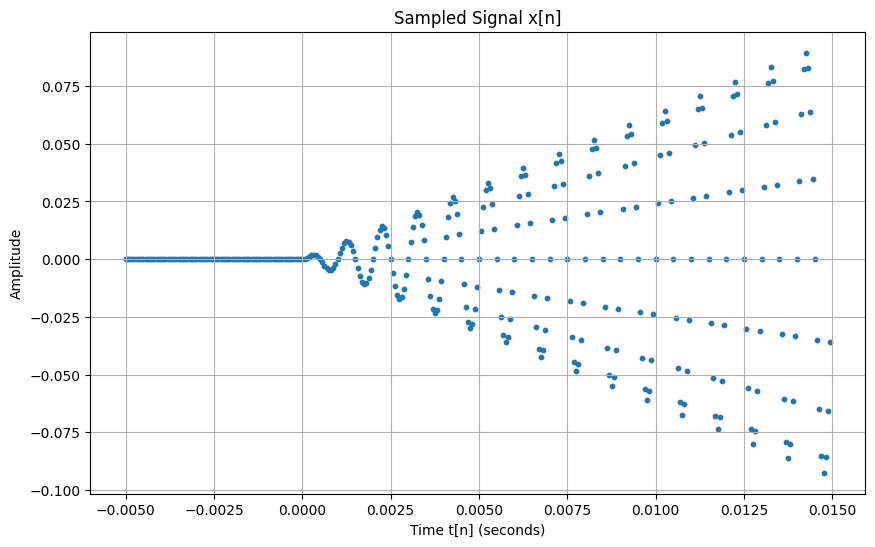

In [ ]:
# 2.e)

import numpy as np
import matplotlib.pyplot as plt


def x_t(t):
    return np.sin(2000 * np.pi * t) * np.sin(2 * np.pi * t) * (t >= 0) * (t <= 0.5)


Fs = 16000
T_sample = 1 / Fs
t_sample = np.arange(-0.005, 0.015, T_sample)

x_sampled = x_t(t_sample)

# Plot the sampled signal using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(t_sample, x_sampled, label="Sampled Signal x[n]", s=10)
plt.title("Sampled Signal x[n]")
plt.xlabel("Time t[n] (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

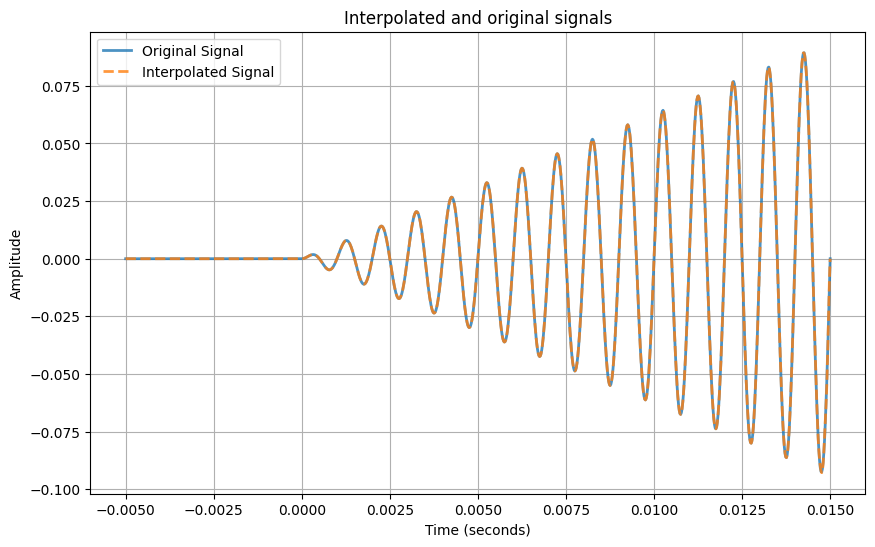

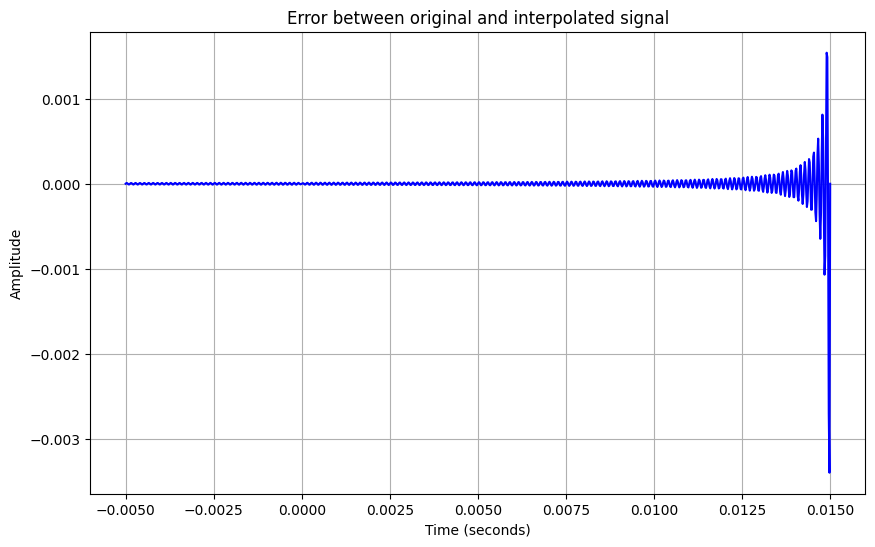

In [101]:
# 2.f)
def interpolate(t, xn, tn):
    """
    t: input time vector
    xn: a vector of the time-samples x[n]
    tn: the corresponding time vector for the sampled times
    return value: an estimate of the original signal x(t) at time t obtained interpolating the time-sampled signal xn with the sinc function
    """
    Fs = 1 / (tn[1] - tn[0])

    x_interp = np.zeros_like(t)

    for i, ti in enumerate(t):
        sinc_terms = np.sinc(Fs * (ti - tn))
        x_interp[i] = np.sum(xn * sinc_terms)

    return x_interp


t = np.linspace(-0.005, 0.015, 1000)
x_interp = interpolate(t, x_sampled, t_sample)
x_orig = x_t(t)
# original signal vs interpolated signal
plt.figure(figsize=(10, 6))
plt.plot(t, x_orig, label="Original Signal", alpha=0.8, linewidth=2, linestyle="-")
plt.plot(t, x_interp, label="Interpolated Signal", alpha=0.8, linewidth=2, linestyle="--")
plt.title("Interpolated and original signals")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(
    t,
    x_orig - x_interp,
    label="Error between original and interpolated signal",
    c="blue",
)
plt.title("Error between original and interpolated signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()